In [1]:
# import library yang dibutuhkan

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
# dataframe
df = pd.read_csv('seoul_realestate.csv', usecols=['avg_sales','households', 'score', 'm2', 'p', 'buildDate'])
# menampilkan 5 baris teratas dataframe
df.head()

,households,buildDate,score,m2,p,avg_sales
0,492,200006,4.3,139,42,61000.0
1,468,200105,4.1,105,32,51000.0
2,57,200502,4.8,86,26,40500.0
3,216,199509,4.8,102,31,34500.0
4,165,200306,4.8,91,28,40000.0


In [28]:
#Mengetahui jumlah kolom dan baris dari data.
df.shape

(4021, 6)

In [29]:
#Melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4021 entries, 0 to 4020
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   households  4021 non-null   int64  
 1   buildDate   4021 non-null   int64  
 2   score       4021 non-null   float64
 3   m2          4021 non-null   int64  
 4   p           4021 non-null   int64  
 5   avg_sales   3931 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 188.6 KB


In [31]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.
df.describe()

,households,buildDate,score,m2,p,avg_sales
count,4021.000000,4021.000000,4021.000000,4021.000000,4021.000000,3931.000000
mean,376.167371,200075.918926,3.437205,82.188013,24.881124,46564.945307
std,543.916736,1068.714500,1.558044,29.548795,8.938195,27997.641529
min,30.000000,196506.000000,0.000000,0.000000,0.000000,2700.000000
25%,78.000000,199603.000000,3.500000,71.000000,21.000000,31000.000000
50%,189.000000,200209.000000,4.000000,81.000000,25.000000,41500.000000
75%,452.000000,200610.000000,4.300000,95.000000,29.000000,54500.000000
max,9510.000000,202409.000000,5.000000,280.000000,85.000000,362000.000000


In [40]:
#Mencari missing values
df.isnull().sum()

households     0
buildDate      0
score          0
m2             0
p              0
avg_sales     90
dtype: int64

In [41]:
# menghapus baris yang terdapat nilai null
df1 = df.dropna()

In [42]:
# cek kembali data apakah masih ada null atau tidak
df1.isnull().sum()

households    0
buildDate     0
score         0
m2            0
p             0
avg_sales     0
dtype: int64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


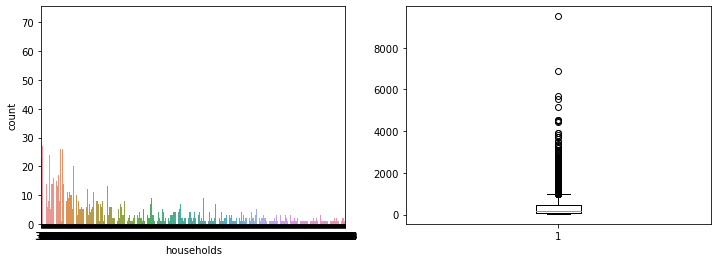

In [43]:
# univariate analysis households
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df1['households'])
f.add_subplot(1,2,2)
plt.boxplot(df1['households'])
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


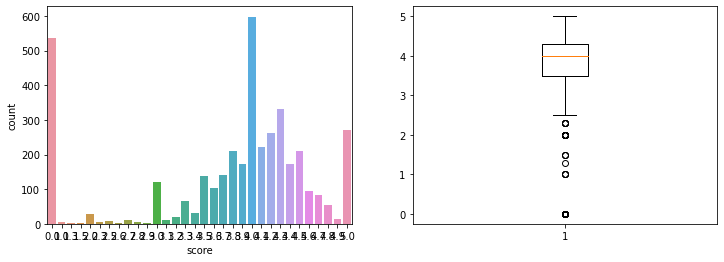

In [44]:
#Univariate analysis score.

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df1['score'])
f.add_subplot(1,2,2)
plt.boxplot(df1['score'])
plt.show()

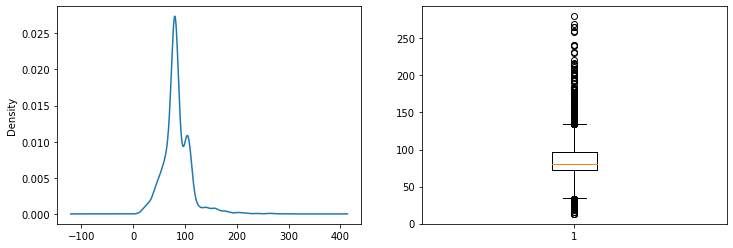

In [45]:
#Univariate analysis m2.

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df1['m2'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df1['m2'])
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


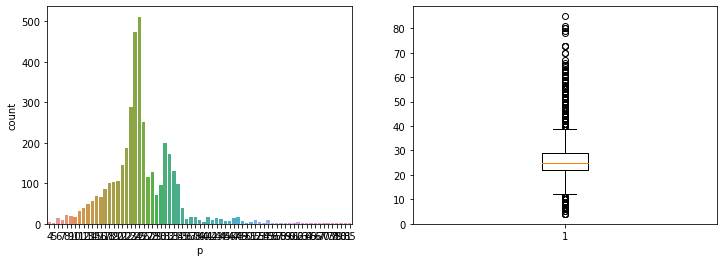

In [46]:
#Univariate analysis p.

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df1['p'])
f.add_subplot(1,2,2)
plt.boxplot(df1['p'])
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


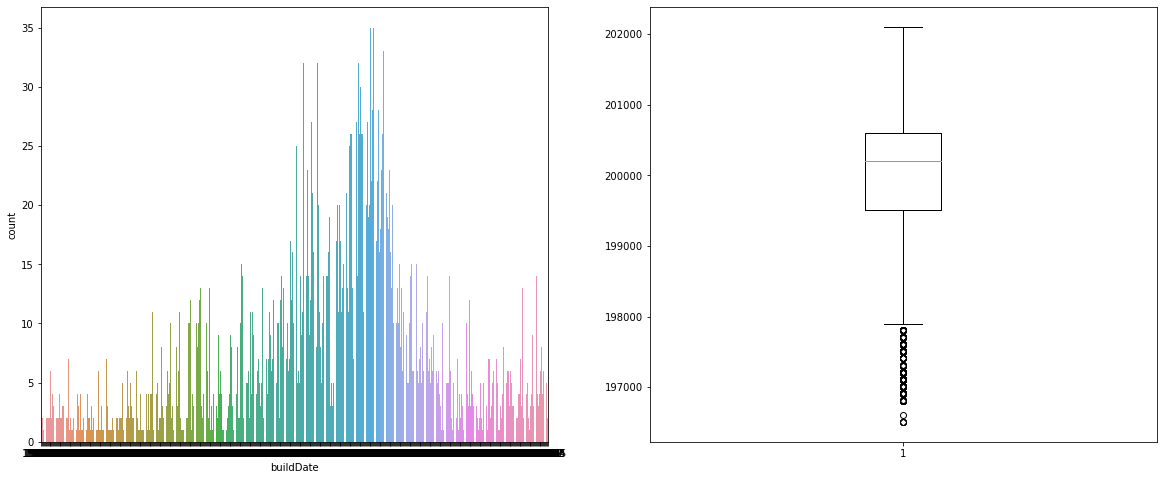

In [47]:
#Univariate analysis buildDate

f = plt.figure(figsize=(20,8))
f.add_subplot(1,2,1)
sns.countplot(df1['buildDate'])
f.add_subplot(1,2,2)
plt.boxplot(df1['buildDate'])
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

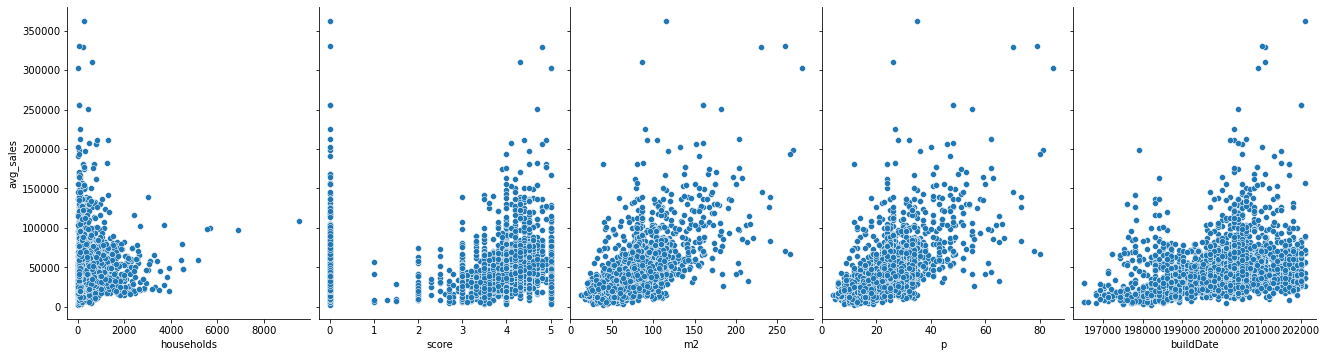

In [48]:
#Bivariate analysis antara independent variable dan dependent variable.

plt.figure(figsize=(10,8))
sns.pairplot(data=df1, x_vars=['households', 'score', 'm2', 'p', 'buildDate'], y_vars=['avg_sales'], size=5, aspect=0.75)

In [49]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable.
df1.corr().style.background_gradient().set_precision(2)

,households,buildDate,score,m2,p,avg_sales
households,1.00,0.00,0.18,-0.09,-0.09,0.09
buildDate,0.00,1.00,0.02,0.14,0.14,0.33
score,0.18,0.02,1.00,0.12,0.12,0.10
m2,-0.09,0.14,0.12,1.00,1.00,0.56
p,-0.09,0.14,0.12,1.00,1.00,0.56
avg_sales,0.09,0.33,0.10,0.56,0.56,1.00


In [50]:
#buat variabel x dan y.
x = df1.drop(columns='avg_sales')
y = df1['avg_sales']
#split data menjadi training and testing dengan porsi 80:20.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#bikin object linear regresi.
lin_reg = LinearRegression()
#train the model menggunakan training data yang sudah displit.
lin_reg.fit(x_train, y_train)
#cari tau nilai slope/koefisien (m) dan intercept (b).
print(lin_reg.coef_)
print(lin_reg.intercept_)

[  6.9370261    6.86622838  55.64732507 395.57618174 544.03590907]
-1376692.554799615


In [51]:
# cari tahu accuracy score dari model menggunakan testing data yang sudah displit.
lin_reg.score(x_test, y_test)

0.4059335277398368

In [52]:
#Prediksi rata-rata penjualan
# jumlah households = 500
# tanggal dibangun  = 200105
# score = 4
# m2 = 100
# p = 20
lin_reg.predict([[500,200105,4,100,20]])

array([51403.5139666])